In [1]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram
from coldquanta.qiskit_tools.coldquanta_sim_backend import ColdQuantaSimBackend
import math

/Users/anthonypolloreno/.pyenv/versions/3.7.4/envs/qaoa_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: rx keyword argument q is deprecated and replaced with qubit.
  This is separate from the ipykernel package so we can avoid doing imports until


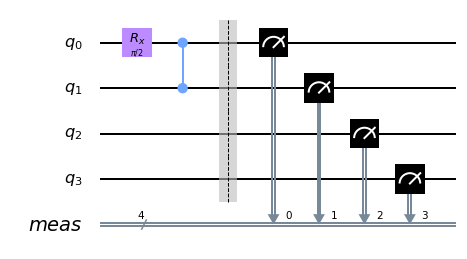

In [2]:
# Construct quantum circuit
circ = QuantumCircuit(4)
circ.rx(q=0, theta=math.pi / 2)
circ.cz(0,1)    
circ.measure_all()

circ.draw(output="mpl")

In [3]:
# Create a mock machine configuration
neutral_atom = ColdQuantaSimBackend(rows=2, cols=2)
neutral_atom_config = neutral_atom.configuration()
coupling_map = neutral_atom_config.coupling_map

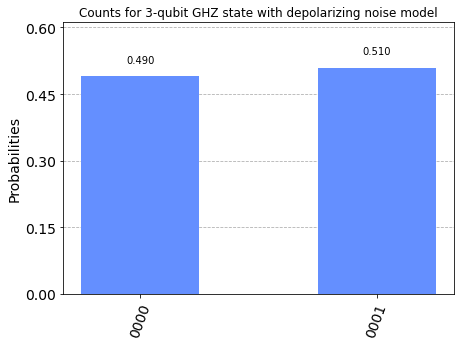

In [4]:
# Create a simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute noise-free simulation and get counts
result_noise = execute(circ,
                       simulator,
                       coupling_map=coupling_map,
                       optimization_level=0).result()
counts_noise = result_noise.get_counts()
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")

In [5]:
# Create a circuit with incorrect connectivity
# Construct quantum circuit
circ_2 = QuantumCircuit(4)
#CZ between opposite corners on the square that is not possible
circ_2.cz(0,3)    
circ_2.measure_all()
circ_2.draw(output="mpl")

# Validate the circuit, this should throw an error
neutral_atom.validate_circuit(circ_2)

ValueError: CZ gate between qubits 0 and 3 is not possible

In [8]:
# Create a circuit with incorrect gate set
# Construct quantum circuit
circ_3 = QuantumCircuit(4)
circ_3.rx(q=0, theta=0.1)    
circ_3.measure_all()
circ_3.draw(output="mpl")

# Validate the circute, this should throw an error
neutral_atom.validate_circuit(circ_3)


/Users/anthonypolloreno/.pyenv/versions/3.7.4/envs/qaoa_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: rx keyword argument q is deprecated and replaced with qubit.
  after removing the cwd from sys.path.


ValueError: Circuit operation rx has no equivalent in the neutral atom gateset ['id', 'cz', 'r', 'rz', 'measure', 'barrier']